In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
import time
import warnings
import gc, sys
import statsmodels.api as sm
# warnings.filterwarnings('ignore')

In [2]:
# read the input data
raw_data = pd.read_csv('yellow_tripdata_2019-06.csv')
print("There are " + str(len(raw_data)) + " observations in the dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display first rows in the dataset
raw_data.head()

There are 3936004 observations in the dataset.
There are 18 variables in the dataset.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.0,1.0,N,145.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.0,1.0,N,262.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.4,1.0,N,74.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.8,1.0,N,145.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.7,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936004 entries, 0 to 3936003
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), int64(1), object(3)
memory usage: 540.5+ MB


In [4]:
raw_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,3.936004e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06
mean,1.640733e+00,1.570112e+00,3.095537e+00,1.058665e+00,1.628665e+02,1.612532e+02,1.291269e+00,1.351268e+01,1.162435e+00,4.951916e-01,2.251814e+00,4.071124e-01,2.986211e-01,1.957001e+01,2.274282e+00
std,5.020742e-01,1.214708e+00,2.351466e+01,7.215995e-01,6.636449e+01,7.048365e+01,4.800985e-01,1.257028e+01,1.275248e+00,5.969404e-02,2.858797e+00,1.818862e+00,2.753095e-02,1.541216e+01,7.285723e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.050000e+02,-2.650000e+01,-5.000000e-01,-8.888000e+01,-1.900000e+01,-3.000000e-01,-3.058000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.160000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.500000e+01,2.500000e+00,5.000000e-01,2.960000e+00,0.000000e+00,3.000000e-01,2.100000e+01,2.500000e+00
max,4.000000e+00,9.000000e+00,4.597722e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.004000e+03,1.850000e+01,3.080000e+01,3.569000e+02,8.230000e+02,3.000000e-01,3.007300e+03,2.750000e+00


In [5]:
raw_data.isna().sum()

VendorID                 0
tpep_pickup_datetime     1
tpep_dropoff_datetime    1
passenger_count          1
trip_distance            1
RatecodeID               1
store_and_fwd_flag       1
PULocationID             1
DOLocationID             1
payment_type             1
fare_amount              1
extra                    1
mta_tax                  1
tip_amount               1
tolls_amount             1
improvement_surcharge    1
total_amount             1
congestion_surcharge     1
dtype: int64

In [6]:
raw_data = raw_data.dropna()

In [7]:
nRow, nCol = raw_data.shape

In [8]:
print(len(raw_data[raw_data['trip_distance'] == 0]), 'people who trip distance is 0')
print(len(raw_data[raw_data['trip_distance'] == 0]) / nRow) 
raw_data = raw_data[raw_data['trip_distance'] > 0]
print('Dropped all trip_distance <= 0')

32230 people who trip distance is 0
0.008188510018920209
Dropped all trip_distance <= 0


In [9]:
print(len(raw_data[raw_data['improvement_surcharge'] != 0.3]), 'surcharge that should have been $0.3')
print(len(raw_data[raw_data['improvement_surcharge'] != 0.3]) / nRow)
raw_data = raw_data[raw_data['improvement_surcharge'] == 0.3]
print('Dropped all corrupted data')

6980 surcharge that should have been $0.3
0.0017733726320838677
Dropped all corrupted data


In [10]:
print(raw_data['payment_type'].unique())
raw_data = pd.get_dummies(raw_data, columns=['payment_type'])

[2. 1. 3. 4.]


In [11]:
print(raw_data['store_and_fwd_flag'].unique())
raw_data = pd.get_dummies(raw_data, columns=['store_and_fwd_flag'])

['N' 'Y']


In [12]:
print(raw_data['RatecodeID'].unique())
print(len(raw_data[raw_data['RatecodeID'] == 99]), 'there are. We should not have data in the form of 99')
raw_data = raw_data[raw_data['RatecodeID'] != 99]
print(raw_data['RatecodeID'].unique())
raw_data = pd.get_dummies(raw_data, columns=['RatecodeID'])

[ 1.  2.  5.  4.  3.  6. 99.]
86 there are. We should not have data in the form of 99
[1. 2. 5. 4. 3. 6.]


In [13]:
raw_data['tolal_non_trip_extra_fares'] = raw_data['total_amount'] - raw_data['fare_amount']

In [14]:
print(raw_data['VendorID'].unique())
print(len(raw_data[raw_data['VendorID'] == 4]), 'there are. We should not have data in the form of 4')
raw_data = raw_data[raw_data['VendorID'] != 4]
print(raw_data['VendorID'].unique())
raw_data = pd.get_dummies(raw_data, columns=['VendorID'])

[1 2 4]
14241 there are. We should not have data in the form of 4
[1 2]


In [15]:
print(raw_data['mta_tax'].unique())
print(len(raw_data[raw_data['mta_tax'] == 0]))
print(len(raw_data[raw_data['mta_tax'] == 0]) / nRow)
raw_data = raw_data[raw_data['mta_tax'] != 0]
raw_data = raw_data.drop(['mta_tax'], axis=1) # all mta_tax data are equal

[0.5 0. ]
14919
0.003790393452444015


In [16]:
print(raw_data['improvement_surcharge'].unique())
raw_data = raw_data.drop(['improvement_surcharge'], axis=1) # all improvement_surcharge data are equal

[0.3]


In [17]:
print(raw_data['extra'].unique())

[0.5  1.   3.   0.   2.5  3.5  8.5  1.75 4.   7.5  2.8  7.   4.5  2.
 5.5  2.15 9.5  0.01 5.   2.61 0.11]


In [18]:
zone_data = pd.read_csv('taxi+_zone_lookup.csv')
print("There are " + str(len(zone_data)) + " observations in the dataset.")
print("There are " + str(len(zone_data.columns)) + " variables in the dataset.")
zone_data = zone_data.dropna()
zone_data.head()

There are 265 observations in the dataset.
There are 4 variables in the dataset.


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [19]:
raw_data = raw_data[raw_data['PULocationID'] < 263]

In [20]:
raw_data = pd.merge(left=raw_data, right=zone_data, how='inner', left_on='PULocationID', right_on='LocationID')

In [21]:
print(raw_data['service_zone'].unique())
raw_data = pd.get_dummies(raw_data, columns=['service_zone'])

['Boro Zone' 'Yellow Zone' 'Airports' 'EWR']


In [22]:
raw_data = raw_data.drop(['LocationID'], axis=1)

In [23]:
print(len(raw_data['Zone'].unique()))
raw_data = raw_data.drop(['Zone'], axis=1)

255


In [24]:
print(len(raw_data['Borough'].unique()))
raw_data = pd.get_dummies(raw_data, columns=['Borough'])

6


In [25]:
filtered_zone_data = zone_data[['LocationID', 'Borough']]
raw_data = pd.merge(left=raw_data, right=filtered_zone_data, how='inner', left_on='PULocationID', right_on='LocationID')
raw_data = pd.merge(left=raw_data, right=filtered_zone_data, how='inner', left_on='DOLocationID', right_on='LocationID')

In [26]:
raw_data = raw_data.drop(['LocationID_x'], axis=1)
raw_data = raw_data.drop(['LocationID_y'], axis=1)

In [27]:
raw_data['travel_to_out_borough'] = raw_data['Borough_x'] != raw_data['Borough_y']

In [28]:
raw_data = raw_data.drop(['extra'], axis=1)
raw_data = raw_data.drop(['tolls_amount'], axis=1)

In [29]:
raw_data = raw_data.drop(['Borough_x'], axis=1)
raw_data = raw_data.drop(['Borough_y'], axis=1)
raw_data = raw_data.drop(['PULocationID'], axis=1)
raw_data = raw_data.drop(['DOLocationID'], axis=1)

In [30]:
raw_data['congestion_surcharge'].unique()

array([0.  , 2.5 , 0.75, 2.75, 0.5 ])

In [31]:
raw_data['congestion_surcharge'].value_counts()

congestion_surcharge
2.50    3468222
0.00     287315
2.75         65
0.75         56
0.50          1
Name: count, dtype: int64

In [32]:
raw_data = raw_data[(raw_data['congestion_surcharge'] == 2.5) | (raw_data['congestion_surcharge'] == 0)]

In [33]:
raw_data['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    3468222
0.0     287315
Name: count, dtype: int64

In [34]:
raw_data.loc[ raw_data['congestion_surcharge'] == 2.5, 'taked_congestion_surcharge'] = True
raw_data.loc[ raw_data['congestion_surcharge'] == 0, 'taked_congestion_surcharge'] = False

In [35]:
raw_data = raw_data.drop(['congestion_surcharge'], axis=1)

In [36]:
raw_data['tpep_pickup_datetime'] = pd.to_datetime(raw_data['tpep_pickup_datetime'])
raw_data['tpep_dropoff_datetime'] = pd.to_datetime(raw_data['tpep_dropoff_datetime'])

raw_data['trip_minute'] = (raw_data['tpep_dropoff_datetime'] - raw_data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [37]:
raw_data['is_it_the_weekend'] = raw_data['tpep_pickup_datetime'].apply(lambda x: x.weekday() >= 5)

In [38]:
raw_data['is_it_night'] = (raw_data['tpep_pickup_datetime'].dt.hour >= 21) | (raw_data['tpep_pickup_datetime'].dt.hour < 6)

In [39]:
raw_data = raw_data.drop(['tpep_pickup_datetime'], axis=1)
raw_data = raw_data.drop(['tpep_dropoff_datetime'], axis=1)

In [40]:
print(len(raw_data[(raw_data['tip_amount'] > raw_data['fare_amount'])]), 'people tipped more than the travel fare')
raw_data = raw_data[(raw_data['tip_amount'] < raw_data['fare_amount'])]

2657 people tipped more than the travel fare


In [41]:
print(len(raw_data[(raw_data['payment_type_2.0'] == True) & (raw_data['tip_amount'] != 0)]),'people tipped even though they paid in cash')

80 people tipped even though they paid in cash


In [42]:
print(len(raw_data[raw_data['payment_type_2.0'] == True]), "It's sad, but we don't have tip data for those who pay in cash.")
raw_data = raw_data[raw_data['payment_type_2.0'] == False]
raw_data = raw_data.drop(['payment_type_2.0'], axis=1)

1026779 It's sad, but we don't have tip data for those who pay in cash.


In [43]:
raw_data # final form of data

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type_1.0,payment_type_3.0,payment_type_4.0,store_and_fwd_flag_N,store_and_fwd_flag_Y,...,Borough_Brooklyn,Borough_EWR,Borough_Manhattan,Borough_Queens,Borough_Staten Island,travel_to_out_borough,taked_congestion_surcharge,trip_minute,is_it_the_weekend,is_it_night
2,1.0,1.70,9.5,2.65,15.95,True,False,False,True,False,...,False,False,True,False,False,False,True,12.283333,True,True
3,2.0,1.60,9.5,1.00,14.30,True,False,False,True,False,...,False,False,True,False,False,False,True,10.866667,True,True
5,2.0,1.20,7.5,1.00,12.30,True,False,False,True,False,...,False,False,True,False,False,False,True,8.133333,True,True
7,1.0,8.60,31.5,7.05,42.35,True,False,False,True,False,...,False,False,True,False,False,False,True,34.016667,True,True
8,1.0,1.74,11.0,2.96,17.76,True,False,False,True,False,...,False,False,True,False,False,False,True,14.300000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755652,1.0,1.36,7.5,1.08,12.38,True,False,False,True,False,...,False,False,True,False,False,False,True,7.850000,False,True
3755653,1.0,3.00,11.0,2.96,17.76,True,False,False,True,False,...,False,False,True,False,False,False,True,10.466667,False,True
3755654,1.0,2.73,11.5,1.50,14.30,True,False,False,True,False,...,False,False,True,False,False,False,False,11.283333,False,True
3755655,1.0,3.36,11.5,0.00,15.30,True,False,False,True,False,...,False,False,True,False,False,False,True,9.716667,False,True


In [44]:
raw_data.columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount',
       'total_amount', 'payment_type_1.0', 'payment_type_3.0',
       'payment_type_4.0', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'RatecodeID_1.0', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0',
       'RatecodeID_5.0', 'RatecodeID_6.0', 'tolal_non_trip_extra_fares',
       'VendorID_1', 'VendorID_2', 'service_zone_Airports',
       'service_zone_Boro Zone', 'service_zone_EWR',
       'service_zone_Yellow Zone', 'Borough_Bronx', 'Borough_Brooklyn',
       'Borough_EWR', 'Borough_Manhattan', 'Borough_Queens',
       'Borough_Staten Island', 'travel_to_out_borough',
       'taked_congestion_surcharge', 'trip_minute', 'is_it_the_weekend',
       'is_it_night'],
      dtype='object')

In [45]:
ist_X = raw_data['is_it_night']
ist_y = raw_data['tip_amount']

model = sm.OLS(ist_y, ist_X).fit()
predictions = model.predict(ist_X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             tip_amount   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.153
Method:                 Least Squares   F-statistic:                          4.935e+05
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                        0.00
Time:                        14:12:26   Log-Likelihood:                     -7.3776e+06
No. Observations:             2725665   AIC:                                  1.476e+07
Df Residuals:                 2725664   BIC:                                  1.476e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
is_it_night     3.0614      0.004    702.461      0.000       3.053       3.070
==============================================================================
Omnibus:                  1042909.836   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6456529.306
Skew:                           1.723   Prob(JB):                         0.00
Kurtosis:                       9.707   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\alper\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


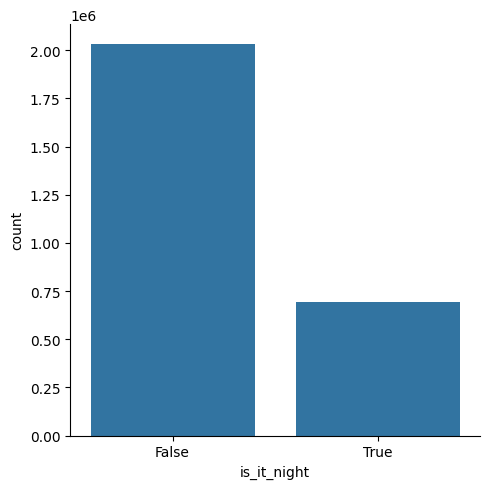

In [46]:
sns.catplot(x='is_it_night', kind='count', data=raw_data)

C:\Users\alper\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


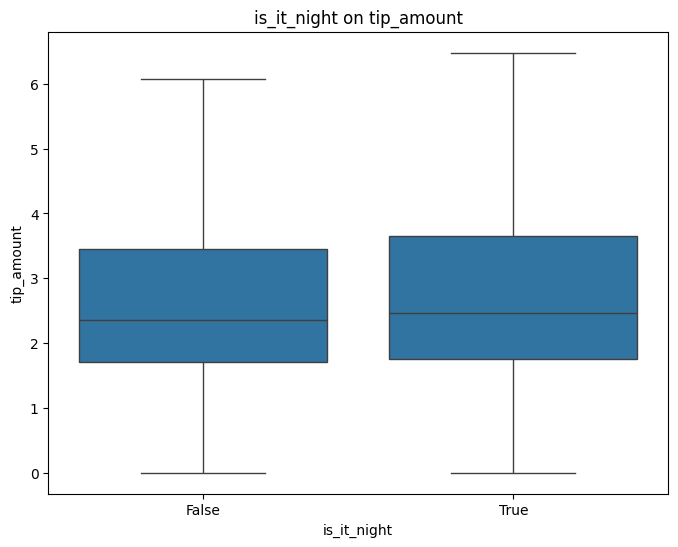

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_it_night', y='tip_amount', data=raw_data, showfliers=False)
plt.title('is_it_night on tip_amount')
plt.xlabel('is_it_night')
plt.ylabel('tip_amount')
plt.show()

In [48]:
X = raw_data.drop(columns=["tip_amount"])
y = raw_data["tip_amount"]

In [49]:
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2725665, 33) y.shape= (2725665,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (2180532, 33) Y_train.shape= (2180532,)
X_test.shape= (545133, 33) Y_test.shape= (545133,)


In [51]:
from sklearn.tree import DecisionTreeRegressor

sklearn_dt = DecisionTreeRegressor(max_depth=32, random_state=35)

t0 = time.time()
sklearn_dt.fit(X_train, y_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  15.02722


In [52]:
from sklearn.metrics import mean_squared_error

sklearn_pred = sklearn_dt.predict(X_test)

# evaluate mean squared error on the test dataset
sklearn_mse = mean_squared_error(y_test, sklearn_pred)
print('[Scikit-Learn] MSE score : {0:.3f}'.format(sklearn_mse))

[Scikit-Learn] MSE score : 0.149


In [53]:
from sklearn.metrics import mean_absolute_error

sklearn_mae = mean_absolute_error(y_test, sklearn_pred)
print('[Scikit-Learn] MaE score : {0:.3f}'.format(sklearn_mae))

[Scikit-Learn] MaE score : 0.067


In [54]:
history = []
for depth in range(4, 33, 4):
    sklearn_dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    t0 = time.time()
    sklearn_dt.fit(X_train, y_train)
    sklearn_time = time.time()-t0

    sklearn_pred = sklearn_dt.predict(X_test)

    sklearn_mae_ = mean_absolute_error(y_test, sklearn_pred)
    
    print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))
    print(depth, 'depth [Scikit-Learn] MAE score : {0:.3f}'.format(sklearn_mae_))
    history.append([depth, sklearn_time, sklearn_mae_])

[Scikit-Learn] Training time (s):  3.84991
4 depth [Scikit-Learn] MAE score : 0.454
[Scikit-Learn] Training time (s):  7.67789
8 depth [Scikit-Learn] MAE score : 0.255
[Scikit-Learn] Training time (s):  9.99430
12 depth [Scikit-Learn] MAE score : 0.138
[Scikit-Learn] Training time (s):  11.79287
16 depth [Scikit-Learn] MAE score : 0.084
[Scikit-Learn] Training time (s):  13.38354
20 depth [Scikit-Learn] MAE score : 0.070
[Scikit-Learn] Training time (s):  13.71622
24 depth [Scikit-Learn] MAE score : 0.066
[Scikit-Learn] Training time (s):  14.14704
28 depth [Scikit-Learn] MAE score : 0.066
[Scikit-Learn] Training time (s):  13.44144
32 depth [Scikit-Learn] MAE score : 0.066


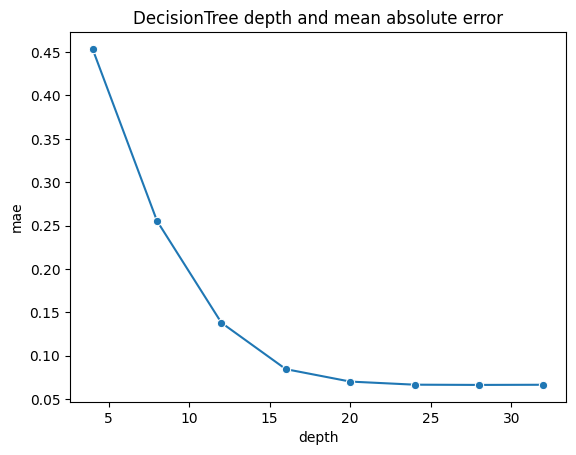

In [55]:
df = pd.DataFrame(history, columns=['depth', 'time', 'mae'])

# Sütunlar arasında sıralı bir böğürtlen çizimi yapma
sns.lineplot(data=df, x='depth', y='mae', marker='o')

# Grafik başlığını ve eksen etiketlerini ekleme
plt.title('DecisionTree depth and mean absolute error')
plt.xlabel('depth')
plt.ylabel('mae')

# Görseli görüntüleme
plt.show()